In [106]:
import pandas as pd

### Method 1
#### Lowercasing



In [107]:
df = pd.read_csv("IMDB Dataset.csv")

In [108]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [109]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [110]:
df['review'] = df['review'].str.lower()

In [111]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Method 2
#### Remove HTML Tags

In [112]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

input = "Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

remove_html_tags(input)

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [113]:
df['review'] = df['review'].apply(remove_html_tags)

### Method 3
#### Remove URLs

In [114]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

print(remove_url(text1))
print(remove_url(text2))
print(remove_url(text3))
print(remove_url(text4))

Check out my notebook 
Check out my notebook 
Google search here 
For notebook click  to search check 


### Method 4
#### Removing Punctuation

In [115]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [116]:
exclude = string.punctuation

In [117]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char, '')
    return text

In [118]:
text = 'string. With. Punctuation?'



# measure timing 
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1 * 50000)
# hence it is very time consuming on larger dataset


string With Punctuation
0.0


In [119]:
# creating effecient function 
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [120]:
# measure timing 
start = time.time()
print(remove_punc1(text))
time1 = time.time() - start
print(time1 * 50000)

string With Punctuation
0.0


### Method 4
#### Char word treatment

In [121]:
chat_words = {
    'AFAIK': "As Far As I Know",
    'AFK': "Away From Keyboard",
    'ASAP': "As Soon As Possible",
    'ATK': "At The Keyboard",
    'ATM': "At The Moment",
    'A3': "Anytime, Anywhere, Anyplace",
    'BAK': "Back At Keyboard",
    'BBL': "Be Back Later",
    'BBS': "Be Back Soon",
    'BFN': "Bye For Now",
    'B4N': "Bye For Now",
    'BRB': "Be Right Back",
    'BRT': "Be Right There",
    'BTW': "By The Way",
    'B4': "Before",
    'B4N': "Bye For Now",
    'CU': "See You",
    'CUL8R': "See You Later",
    'CYA': "See You",
    'FAQ': "Frequently Asked Questions",
    'FC': "Fingers Crossed",
    'FWIW': "For What It's Worth",
    'FYI': "For Your Information",
    'GAL': "Get A Life",
    'GG': "Good Game",
    'GN': "Good Night",
    'GMTA': "Great Minds Think Alike",
    'GR8': "Great!",
    'G9': "Genius",
    'IC': "I See",
    'ICQ': "I Seek you(also a chat program)",
    'ILU': "ILU: I Love You",
    'IMHO': "In My Honest/Humble Opinion",
    'IMO': "In My Opinion",
    'IOW': "In Other Words",
    'IRL': "In Real Life",
    'KISS': "Keep It Simple, Stupid",
    'LDR': "Long Distance Relationship",
    'LMAO': "Laugh My A.. Off",
    'LOL': "Laughing Out Loud",
    'LTNS': "Long Time No See",
    'L8R': "Later",
    'MTE': "My Thoughts Exactly",
    'M8': "Mate",
    'NRN': "No Reply Necessary",
    'OIC': "Oh I See",
    'PITA': "Pain In The A..",
    'PRT': "Party",
    'PRW': "Parents Are Watching",
    'QPSA': "	Que Pasa?",
    'ROFL': "Rolling On The Floor Laughing",
    'ROFLOL': "Rolling On The Floor Laughing Out Loud",
    'ROTFLMAO': "Rolling On The Floor Laughing My A.. Off",
    'SK8': "Skate",
    'STATS': "Your sex and age",
    'ASL': "Age, Sex, Location",
    'THX': "Thank You",
    'TTFN': "Ta-Ta For Now!",
    'TTYL': "Talk To You Later",
    'U': "You",
    'U2': "You Too",
    'U4E': "Yours For Ever",
    'WB': "Welcome Back",
    'WTF': "What The F...",
    'WTG': "Way To Go!",
    'WUF': "Where Are You From?",
    'W8': "Wait...",
    '7K': "Sick: -D Laugher",
    'TFW': "That feeling when. TFW internet slang often goes in a caption to an image.",
    'MFW': "My face when",
    'MRW': "My reaction when",
    'IFYP': "I feel your pain",
    'LOL': "Laughing out loud",
    'TNTL': "Trying not to laugh",
    'JK': "Just kidding",
    'IDC': "I don’t care",
    'ILY': "I love you",
    'IMU': "I miss you",
    'ADIH': "Another day in hell",
    'IDC': "I don’t care",
    'ZZZ': "Sleeping, bored, tired",
    'WYWH': "Wish you were here",
    'TIME': "Tears in my eyes",
    'BAE': "Before anyone else",
    'FIMH': "Forever in my heart",
    'BSAAW': "Big smile and a wink",
    'BWL': "Bursting with laughter",
    'LMAO': "Laughing my a ** off",
    'BFF': "Best friends forever",
    'CSL': "Can’t stop laughing",
}

In [122]:
def chat_conversion(text):
    new_text = []
    for char in text.split():
        if char.upper() in chat_words:
            new_text.append(chat_words[char.upper()])
        else:
            new_text.append(char)
    return ' '.join(new_text)

In [123]:
chat_conversion('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [124]:
chat_conversion('FYI delhi is the capital of India')

'For Your Information delhi is the capital of India'

### Method 5
#### Spelling Correction

In [125]:
from textblob import TextBlob

In [126]:
incorrect_text = 'ceertain conditinoas durring seveal ggenerations aree moddified in thee saame maner.'

textBlb = TextBlob(incorrect_text)
textBlb.correct().string

'certain conditions during several generations are modified in thee same manner.'

### Method 6
#### Removing Stop Words

In [127]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\write\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()

    return ' '.join(x)

In [130]:
remove_stopwords("there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera.")

"there's  family   little boy (jake) thinks there's  zombie   closet &  parents  fighting   time.this movie  slower   soap opera."

In [131]:
df['review'].head().apply(remove_stopwords)

0    one    reviewers  mentioned   watching  1 oz e...
1     wonderful little production.  filming techniq...
2     thought    wonderful way  spend time    hot s...
3    basically there's  family   little boy (jake) ...
4    petter mattei's "love   time  money"   visuall...
Name: review, dtype: object

### Method 7
#### Handling Emojies

In [132]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F" # emotions
                              u"\U0001F300-\U0001F5FF" # symbols & pictographs
                              u"\U0001F680-\U0001F6FF" # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [133]:
remove_emoji('Loved the movie. It was 😘😘')

'Loved the movie. It was '

In [134]:
remove_emoji('Lmao 😂😂')

'Lmao '

In [135]:
import emoji
print(emoji.demojize("Python is 🔥"))

Python is :fire:


In [136]:
print(emoji.demojize("Loved the movie. It was 😘"))

Loved the movie. It was :face_blowing_a_kiss:


### Method 7
#### Tokenization

###### Challenges in Tokenization
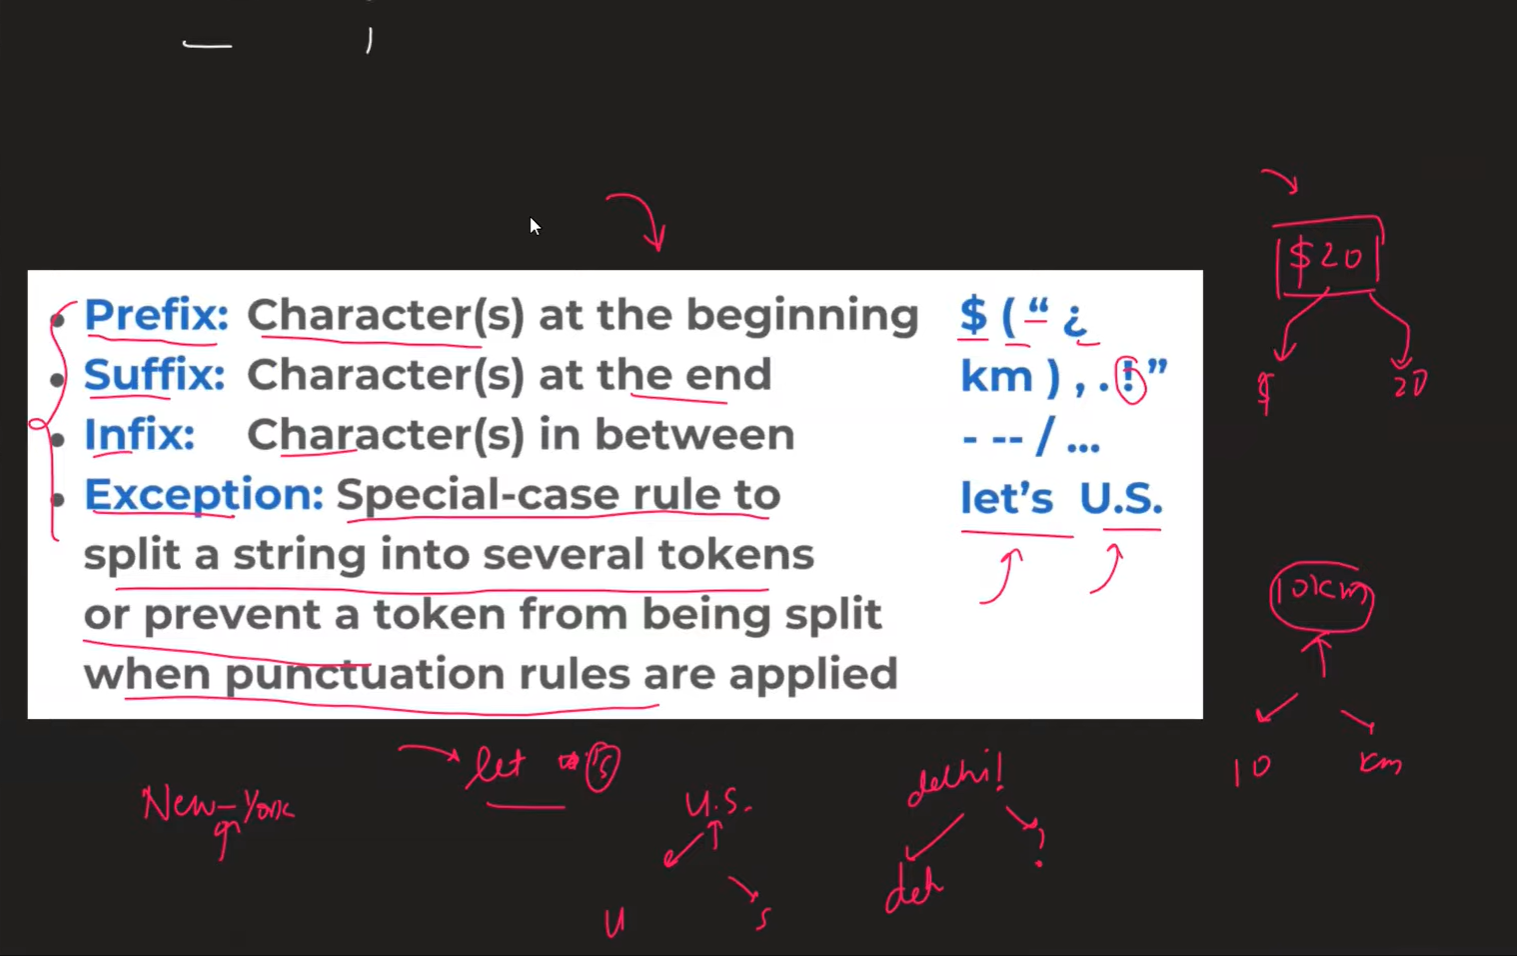

##### a. Using the Split function

In [137]:
# word tokenization
sent1 = 'I am going to delhi'
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [138]:
# sentence tokenization
sent2 = 'I am going to delhi. I will stay there for 3 days. Lets\'s hope the trip to be great'
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 3 days',
 " Lets's hope the trip to be great"]

In [139]:
# Problems with split functoin
sent3 = 'I am going to Delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'Delhi!']

In [140]:
sent4 = 'Where do think I should go? I have 3 day holiday'
sent4.split('.')

['Where do think I should go? I have 3 day holiday']

##### b. Regular Expression

In [141]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

##### c. NLTK

In [142]:
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\write\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [143]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [144]:
sent5 = 'I have Ph.D in A.I'
word_tokenize(sent5)

['I', 'have', 'Ph.D', 'in', 'A.I']

In [145]:
sent6 = "We're here to help! mail us at nks@gmail.com"
word_tokenize(sent6)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

In [146]:
sent7 = 'A 5KM ride cost $10.50'
word_tokenize(sent7)

['A', '5KM', 'ride', 'cost', '$', '10.50']

##### d. Spacy

In [149]:
import spacy


In [151]:
nlp = spacy.load('en_core_web_sm')

In [155]:
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)
doc4 = nlp(sent1)

In [158]:
for token in doc1:
    print(token)

I
have
Ph
.
D
in
A.I


In [161]:
for token in doc2:
    print(token)

We
're
here
to
help
!
mail
us
at
nks@gmail.com


In [162]:
for token in doc3:
    print(token)

A
5KM
ride
cost
$
10.50


In [163]:
for token in doc4:
    print(token)

I
am
going
to
visit
delhi
!


### Method 8
#### Stemming

In [164]:
from nltk.stem.porter import PorterStemmer


In [165]:
ps = PorterStemmer()
def stem_words(text):
    return ' '.join([ps.stem(word) for word in text.split()])

In [166]:
sample = 'walk walks walking walked'
stem_words(sample)

'walk walk walk walk'

In [169]:
sample2 = 'probabily my alltime favority movie a story'
stem_words(sample2)

'probabili my alltim favor movi a stori'

### Method 9
#### Lemmatization


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the sun."
punctuations = "?:!.,;"

sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
    
print(sentence_words)


print("{0:20}{1:20}". format("Word", "Lemma"))
for word in sentence_words:
    print("{0:20}{1:20}".frmat(word, wordnet_lemmatizer.lemmatize(word, pos='v')))

['He', 'was', 'running', 'and', 'eating', 'at', 'same', 'time', 'He', 'has', 'bad', 'habit', 'of', 'swimming', 'after', 'playing', 'long', 'hours', 'in', 'the', 'sun']
Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the         

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\write\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
